# CNN on CIFAR10 Dataset

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [52]:
X_train.shape

(50000, 32, 32, 3)

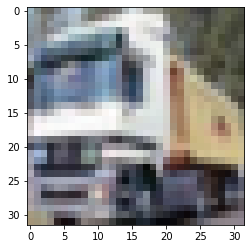

In [53]:
plt.imshow(X_train[1])

## Labels

In [54]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [55]:
from tensorflow.keras.utils import to_categorical

In [56]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [57]:
y_train_cat.shape

(50000, 10)

## Normalizing the X Data
The color values are between 0 and 255. So dividing by 255 will normalize the X_train and X_test.

In [58]:
X_train = X_train/255
X_test = X_test/255

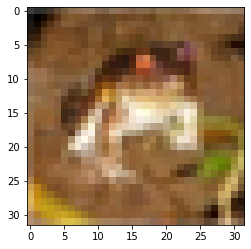

In [59]:
scaled_image = X_train[0]
plt.imshow(scaled_image)

In [60]:
X_train.shape

(50000, 32, 32, 3)

## Training the model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [62]:
model = Sequential()

In [63]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [64]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [65]:
model.add(Flatten())

In [66]:
model.add(Dense(units = 256, activation='relu'))

In [67]:
# Output Layer
# There are 10 classes in CIFAR-10 dataset. So we need 10 neurons at the last layer
model.add(Dense(units=10,activation='softmax'))

In [68]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3)

In [72]:
model.fit(X_train,y_train_cat,epochs=20,callbacks=[early_stopping],validation_data=(X_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 179s 114ms/step - loss: 1.6013 - accuracy: 0.4439 - val_loss: 1.5274 - val_accuracy: 0.4627
Epoch 2/20
1563/1563 [==============================] - 182s 116ms/step - loss: 1.4072 - accuracy: 0.5217 - val_loss: 1.3626 - val_accuracy: 0.5306
Epoch 3/20
1563/1563 [==============================] - 178s 114ms/step - loss: 1.2570 - accuracy: 0.5754 - val_loss: 1.2618 - val_accuracy: 0.5729
Epoch 4/20
1563/1563 [==============================] - 177s 113ms/step - loss: 1.1321 - accuracy: 0.6188 - val_loss: 1.1663 - val_accuracy: 0.6043
Epoch 5/20
1563/1563 [==============================] - 177s 113ms/step - loss: 1.0243 - accuracy: 0.6537 - val_loss: 1.1723 - val_accuracy: 0.6006
Epoch 6/20
1563/1563 [==============================] - 176s 113ms/step - loss: 0.9379 - accuracy: 0.6815 - val_loss: 1.1455 - val_accuracy: 0.6152
Epoch 7/20
1563/1563 [==============================] - 175s 112ms/step - loss: 0.8614 - accuracy: 0.7063 - val_

Epoch 1/20
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5138 - accuracy: 0.4529 - val_loss: 1.2665 - val_accuracy: 0.5447
Epoch 2/20
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1818 - accuracy: 0.5825 - val_loss: 1.1234 - val_accuracy: 0.6096
Epoch 3/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0343 - accuracy: 0.6361 - val_loss: 1.0824 - val_accuracy: 0.6244
Epoch 4/20
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9274 - accuracy: 0.6749 - val_loss: 1.0379 - val_accuracy: 0.6389
Epoch 5/20
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8412 - accuracy: 0.7061 - val_loss: 0.9685 - val_accuracy: 0.6664
Epoch 6/20
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7672 - accuracy: 0.7317 - val_loss: 0.9520 - val_accuracy: 0.6736
Epoch 7/20
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7020 - accuracy: 0.7552 - val_loss: 0.9626 -

## Evaluating the model

In [73]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.513752,0.45294,1.266522,0.5447
1,1.181750,0.58254,1.123353,0.6096
2,1.034325,0.63614,1.082415,0.6244
3,0.927405,0.67490,1.037901,0.6389
4,0.841227,0.70614,0.968452,0.6664
5,0.767237,0.73174,0.952029,0.6736
6,0.702043,0.75518,0.962585,0.6720
7,0.641925,0.77422,0.990696,0.6694
8,0.587194,0.79506,0.991873,0.6788


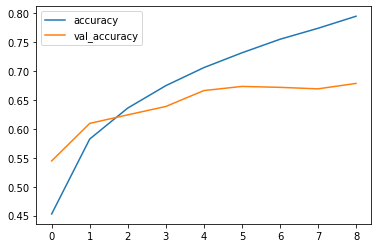

In [74]:
losses[['accuracy','val_accuracy']].plot()

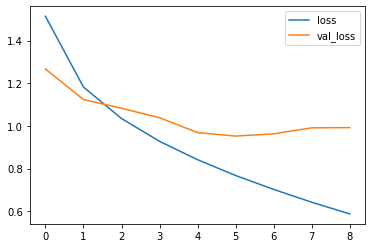

In [75]:
losses[['loss','val_loss']].plot()

In [76]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test_cat,verbose=0))

['loss', 'accuracy']
[0.9918728470802307, 0.6787999868392944]


In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis=1)

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1000
           1       0.83      0.77      0.80      1000
           2       0.60      0.57      0.58      1000
           3       0.46      0.54      0.50      1000
           4       0.64      0.60      0.62      1000
           5       0.60      0.51      0.55      1000
           6       0.67      0.84      0.75      1000
           7       0.78      0.70      0.74      1000
           8       0.76      0.79      0.77      1000
           9       0.80      0.74      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [80]:
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix

array([[719,  26,  55,  24,  26,  10,  12,   6,  90,  32],
       [ 31, 772,   7,  17,   7,   3,  23,   5,  49,  86],
       [ 61,   5, 573, 105,  61,  55,  86,  30,  15,   9],
       [ 21,  11,  66, 542,  63, 152,  93,  25,  16,  11],
       [ 23,   3,  87,  87, 604,  36,  93,  50,  13,   4],
       [ 18,   4,  60, 225,  57, 513,  55,  56,   6,   6],
       [  7,   7,  46,  53,  21,  10, 843,   9,   2,   2],
       [ 17,   8,  35,  67,  84,  49,  20, 700,   6,  14],
       [ 81,  24,  23,  25,  12,  11,   9,   4, 785,  26],
       [ 45,  75,  10,  35,   3,  11,  18,  13,  53, 737]])

In [81]:
import seaborn as sns

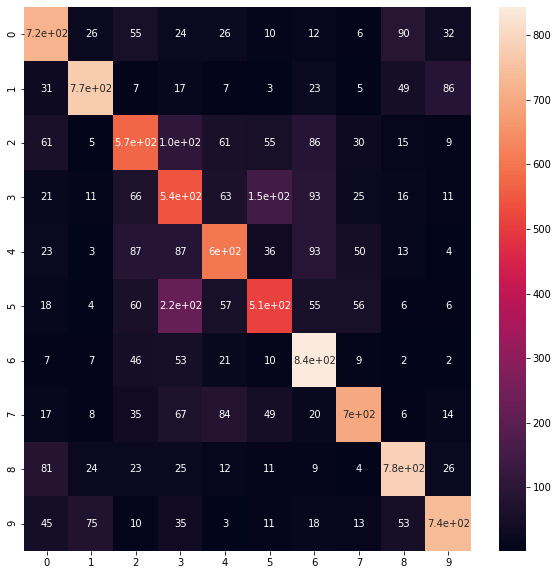

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(data=conf_matrix,annot=True)